# Analysis of NetLogo PVI (pedestrian-vehicle interaction) model

This notebook does:
- Reads netlogo data (output) `log.csv`
- Clean data (we erase the first agents in the simulation, since very low number of initial pedestrian in the intersection skews the model. We then can set in the large-scale model a threshold of intersection crowdness based on number of agents and geometry of intersection. This is a topic for further research. For now, 50 pedestrians enter the simulation every 30 sec.)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.matplotlib.style.use("seaborn")

# Read data from NetLogo

In [6]:
dfl = pd.read_csv('../utilities/tests/log.csv', names=["id","start","end","vmax","num-cars","num-peds","num-cross","in","out","time"])
dfl.shape

(8006, 10)

Lets try to earase first peds with `num-peds = 49`.

In [7]:
dfl.drop(dfl[dfl["num-peds"]==49].index,inplace=True)

In [8]:
#164253 ticks /120 fps ~ 22.8 min
data = dfl.drop(['id','start','end','vmax','num-cross','in','out'],axis=1) 
data['time']= data['time']/120
# data['vmax'] = data['vmax'].mean() * 0.5 * 120
data.to_csv('./netlogo_output.csv')
data.head()

,num-cars,num-peds,time
47,12,87,23.000000
48,12,87,23.483333
49,12,87,24.850000
50,12,87,25.225000
53,12,87,26.650000


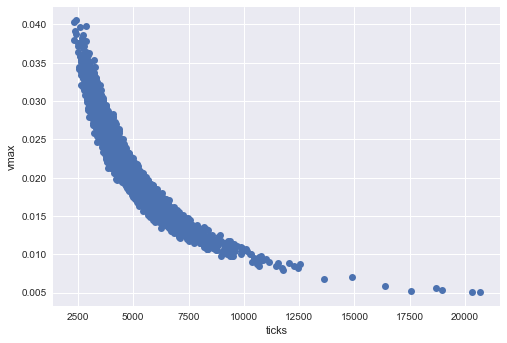

In [9]:
plt.plot(dfl["time"],dfl["vmax"],'o')
plt.xlabel("ticks")
plt.ylabel("vmax");

Text(0.5, 0, 'time')

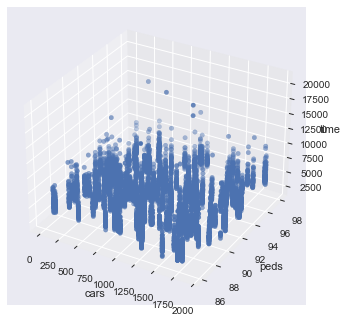

In [10]:
ax = plt.axes(projection='3d')
import numpy as np
x = dfl["num-cars"]
y = dfl["num-peds"]
z = dfl["time"]
ax.scatter(x,y,z)
ax.set_xlabel("cars")
ax.set_ylabel("peds")
ax.set_zlabel("time")

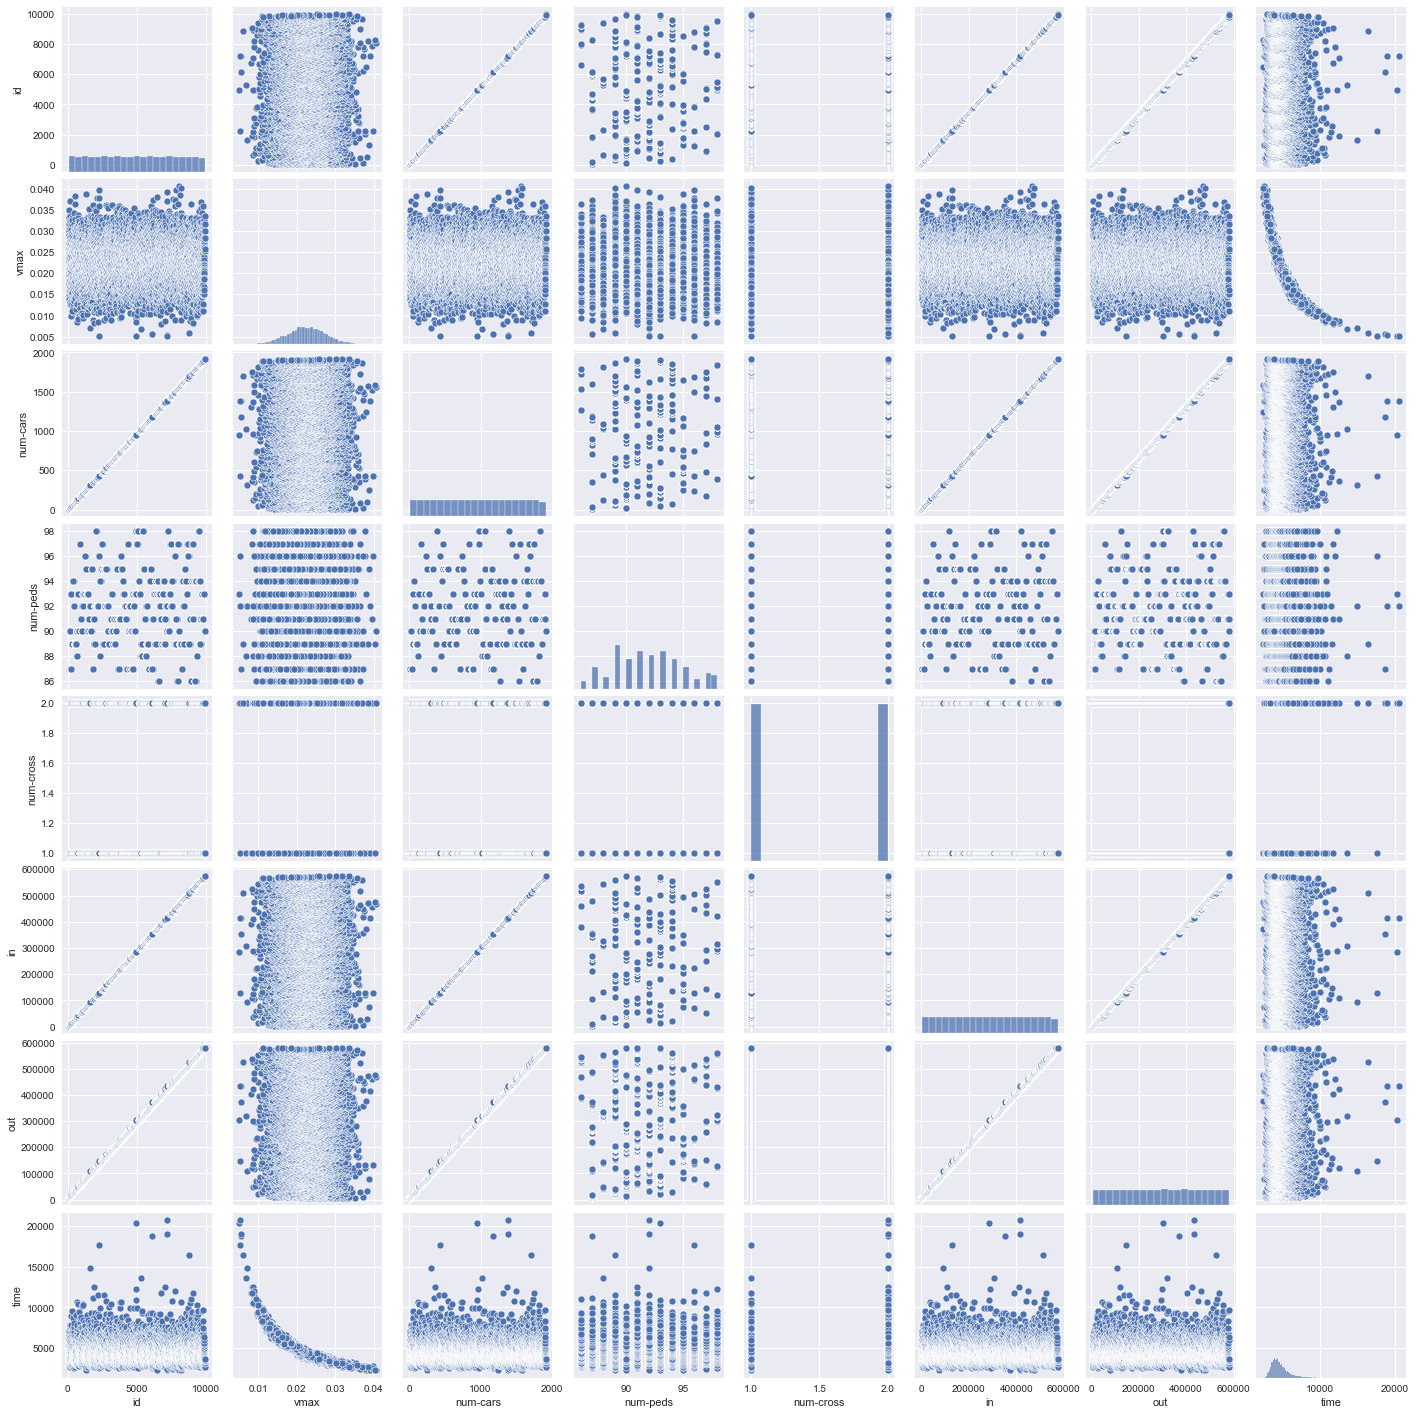

In [11]:
import seaborn as sns
sns.pairplot(dfl)

# Multiple Linear Regression

Based on [Web](https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/)

In [12]:
#separate attributes from predicting attribute
x = dfl.drop(['id','start','end','in','out','time'],axis=1) 
#separate the predicting attribute into Y for model training
y = dfl['time']

In [13]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [14]:
#import module
from sklearn.linear_model import LinearRegression
#create an objeect of LinearRegression class
LR = LinearRegression()
#fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [15]:
y_prediction = LR.predict(x_test)

In [16]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.8724235992102614
mean sqrd error is:180989.53669798732
root mean sqr err is:425.42865053729906


# Random Forest

In [35]:
#separate attributes from predicting attribute
x = dfl.drop(['id','start','end','in','out','time'],axis=1) 
#separate the predicting attribute into Y for model training
y = dfl['time']

In [36]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

#train the model
clf.fit(x_train,y_train)
#predict the model
y_prediction = clf.predict(x_test)

In [38]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.9813087871451988
mean sqrd error is:26516.769041708543
root mean sqr err is:162.83970351762665


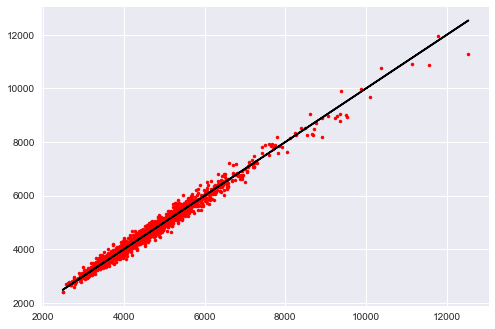

In [39]:
fig, axs = plt.subplots(1)
axs.plot(y_test, y_prediction,'r.')
axs.plot(y_test,y_test,'k-')

# Gaussian Process Regression (not working)

In [21]:
# #separate attributes from predicting attribute
# x = dfl.drop(['id','start','end','in','out','time'],axis=1) 
# #separate the predicting attribute into Y for model training
# y = dfl['time']

In [22]:
# #import train_test_split from sklearn
# from sklearn.model_selection import train_test_split
# #split the data
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [23]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# from sklearn import preprocessing

# #create a GP model
# kernel = C(1.0,(1e-3,1e3))*RBF(1,(1e-2,1e2))
# gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=100,)

# #scale the data
# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train_scaled = scaler.transform(x_train)

# #fit the data
# gp.fit(x_train_scaled,y_train)

# #predict
# y_pred, sigma = gp.predict(x_test, return_std=True)

In [24]:
# #import r2_score module
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# #score
# gp.score(x_train_scaled,y_train)
# #predicting the accuracy score
# score=r2_score(y_test,y_pred)
# meansqerr = mean_squared_error(y_test,y_pred)
# print(f'r2_score is: {score}')
# print(f'mean sqrd error is:{meansqerr}')
# print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

# Krigging (KPLS) with SMT library

In [25]:
dfl.shape

(7956, 10)

In [26]:
#separate attributes from predicting attribute
# x = dfl.drop(['id','start','end','vmax','in','out'],axis=1) 
x = dfl.drop(['id','start','end','in','out'],axis=1) 
xg = x.groupby(by=['num-cars','num-peds','num-cross']).mean()
print(xg.shape)


(320, 2)


In [27]:
xg.head()

vmax         time
num-cars num-peds num-cross                       
12       87       1          0.023029  4268.428571
                  2          0.022461  4861.586207
24       90       1          0.022264  4423.103448
                  2          0.022224  5015.476190
36       87       1          0.022727  4272.851852

In [28]:
# need to use to_records since xg is a group df
x = xg.to_records(index=True)
x = pd.DataFrame(x).to_numpy()
y = x[:,-1]
x = x[:,:-1]
print(x.shape,y.shape)

(320, 4) (320,)


In [29]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

___________________________________________________________________________
   
                                   KPLS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 256
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.3635759
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 64
   
   Predicting ...
   Predicting - done. Time (sec):  0.0035911
   
   Prediction time/pt. (sec) :  0.0000561
   


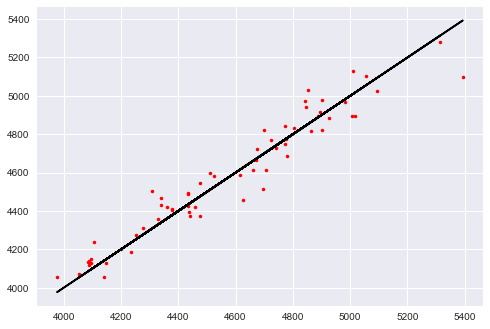

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KPLS

sm = KPLS(theta0=[1e-2])
sm.set_training_values(x_train,y_train)
sm.train()

y_prediction = sm.predict_values(x_test)

fig, axs = plt.subplots(1)
axs.plot(y_test, y_prediction,'r.')
axs.plot(y_test,y_test,'k-')

In [31]:
#import r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#predicting the accuracy score
score=r2_score(y_test,y_prediction)
meansqerr = mean_squared_error(y_test,y_prediction)
print(f'r2_score is: {score}')
print(f'mean sqrd error is:{meansqerr}')
print(f'root mean sqr err is:{np.sqrt(meansqerr)}')

r2_score is: 0.9339310340211381
mean sqrd error is:7443.55206511933
root mean sqr err is:86.27602253882205


# Data from paper

In [32]:
df = pd.read_csv('./data.csv')
df.head()

,id,x_obs,y_obs,x_est,y_est
0,1,2.57,38.10,2.57,38.10
1,1,2.78,37.39,2.78,37.39
2,1,2.95,36.69,2.95,36.69
3,1,3.11,35.97,3.11,35.97
4,1,3.27,35.22,3.27,35.22


In [33]:
def plot_data(num=1):
    fig, ax = plt.subplots(figsize=(2,10))
    for num in range(5):
        x = df[df['id']==num].x_obs
        y = df[df['id']==num].y_obs
        xe = df[df['id']==num].x_est
        ye = df[df['id']==num].y_est
        ax.plot(x,y,label=f'obs{num}')
        ax.plot(xe,ye,label=f'est{num}')
    plt.legend(loc='lower left',bbox_to_anchor=(1.04, 0),fancybox=True,shadow=True)

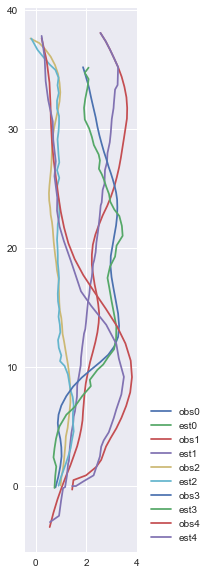

In [34]:
plot_data(5)